In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("data.csv")

In [3]:
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


In [4]:
dataset['Country/Region']

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
259                   France
260              South Sudan
261           Western Sahara
262    Sao Tome and Principe
263                    Yemen
Name: Country/Region, Length: 264, dtype: object

In [5]:
data = dataset.iloc[:,:].values

In [6]:
np.shape(data)

(264, 84)

In [7]:
list(data[0][4:8])

[0, 0, 0, 0]

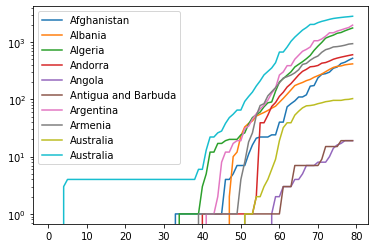

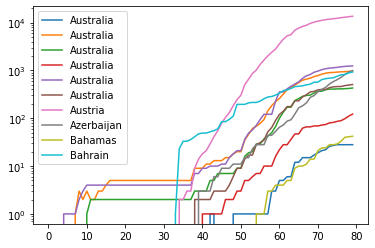

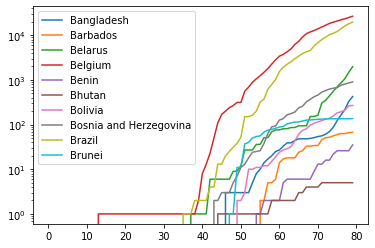

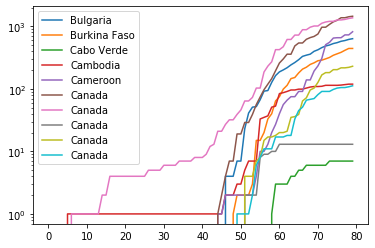

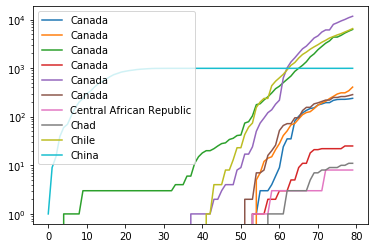

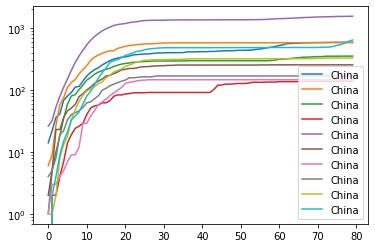

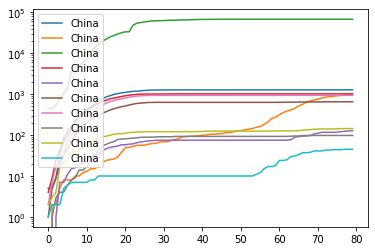

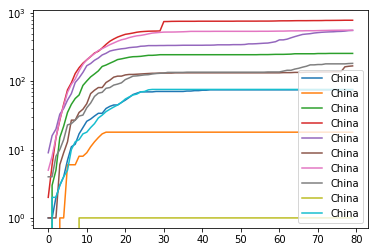

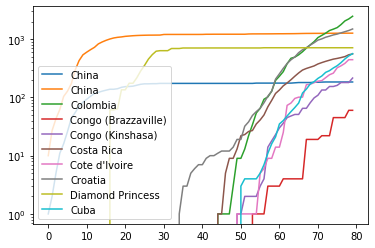

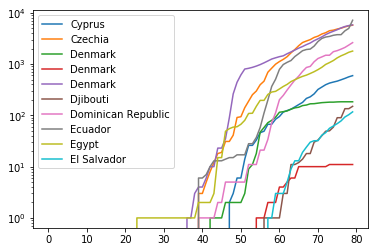

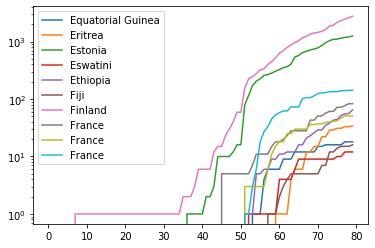

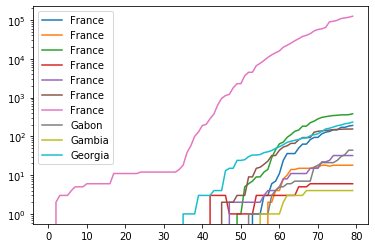

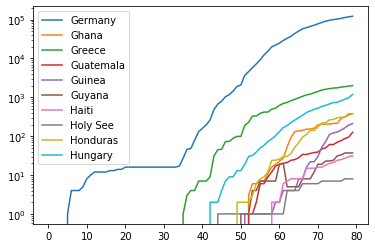

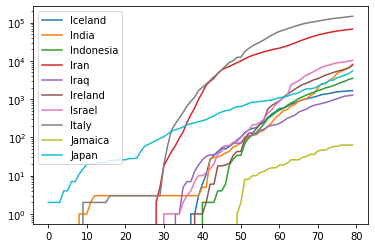

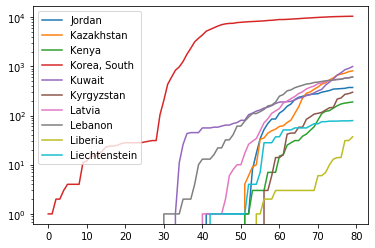

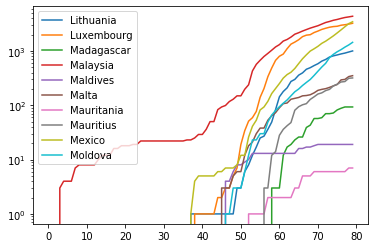

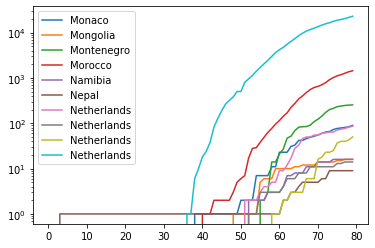

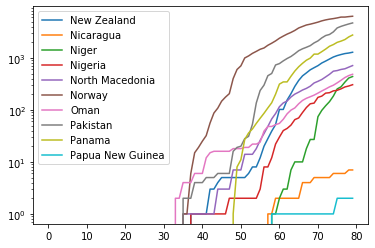

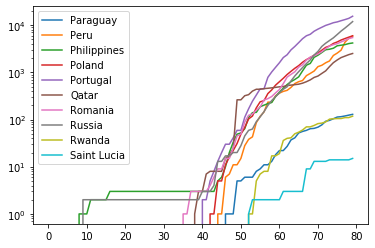

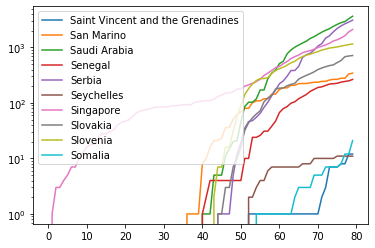

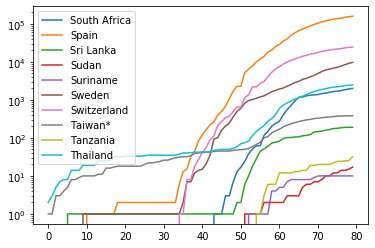

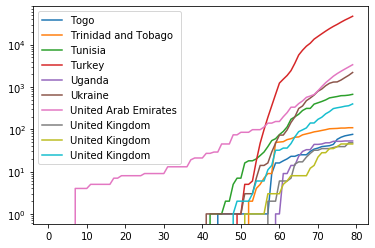

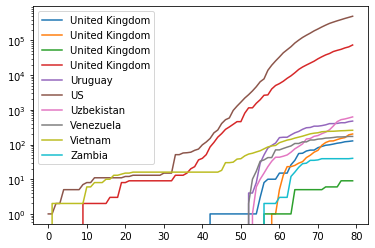

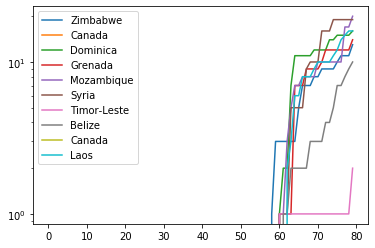

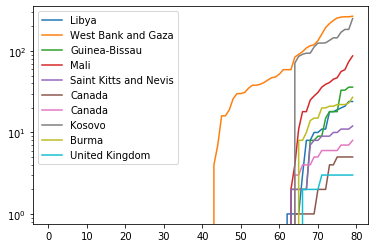

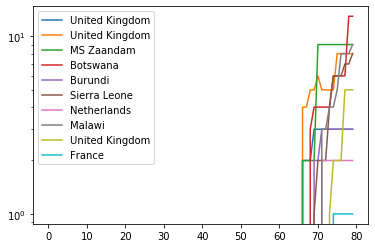

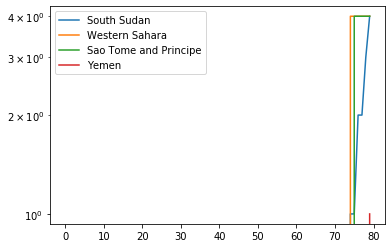

In [8]:

for i in range(0,264):
    line,= plt.plot(list(range(80)), list(data[i][4:]))
    line.set_label(data[i][1])
    plt.legend()
    plt.yscale('log')
    if i%10==9 :
        plt.show()


In [10]:
X=[]
y=[]
for i in range (264):
    for j in range(4,76):
        if data[0][j]!=0:
            X.append (data[i][j:j+7])
            y.append (data[i][j+8])

In [11]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
xg_reg = xgb.XGBRegressor(xgb_grid.best_params_)

In [38]:
xg_reg.fit(np.array(X_train),np.array(y_train))

[23:56:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBoostError: Invalid Parameter format for max_depth expect int but value='{'colsample_bytree': 1.0, 'learning_rate': 0.11, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}'

In [15]:
preds = xg_reg.predict(np.array(X_test))

max 25.394325256347656
min 0.0013418408120224959
mean 3.1707136081190646
var 46.68555387162681
1666


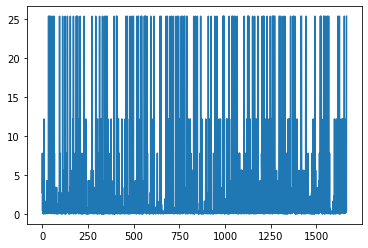

In [16]:
import math
j=0
error = []
for i in preds:
    if y_test[j]!=0:
        error.append( abs(i - y_test[j])/y_test[j] )
    #print (i , y_test[j],X_test[j])
    j=j+1
print("max", np.array(error).max())
print("min", np.array(error).min())
print("mean", np.array(error).mean())
print("var", np.array(error).var())
print( len(error) )
plt.plot( list( range( 0, len(error) ) ) , error)

In [17]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2054.044510


In [18]:
#875 809 565 573 489 701 529 516 545 601
#601 545 516 529 701 489 573 565 809 875
xg_reg.predict(np.array([[516, 529, 701, 489, 573, 565, 809]]))

array([998.2907], dtype=float32)

In [23]:
today=[]
tommorow=[]
country=[]
for i in range(264):
    today.append (data[i][-7:])
    country.append(data[i][1])

In [24]:
tommorow=xg_reg.predict(np.array(today))

In [25]:
for i in range(264):
    print ( country[i],tommorow[i] )

Afghanistan 588.20966
Albania 464.4145
Algeria 2067.7573
Andorra 703.69556
Angola 33.246944
Antigua and Barbuda 33.246944
Argentina 2412.5007
Armenia 999.54407
Australia 130.61537
Australia 3683.385
Australia 49.181942
Australia 1053.7639
Australia 464.4145
Australia 150.63002
Australia 1321.8046
Australia 588.20966
Austria 15270.683
Azerbaijan 1081.5856
Bahamas 60.150772
Bahrain 999.54407
Bangladesh 464.4145
Barbados 77.432556
Belarus 2499.0525
Belgium 36684.277
Benin 52.583973
Bhutan 26.394325
Bolivia 320.96643
Bosnia and Herzegovina 1027.3657
Brazil 23664.088
Brunei 150.63002
Bulgaria 703.69556
Burkina Faso 556.8926
Cabo Verde 26.394325
Cambodia 150.63002
Cameroon 998.2907
Canada 1542.2273
Canada 1542.2273
Canada 26.394325
Canada 269.52267
Canada 150.63002
Canada 269.52267
Canada 464.4145
Canada 8626.232
Canada 42.36148
Canada 14336.634
Canada 320.96643
Central African Republic 26.394325
Chad 26.394325
Chile 8722.226
China 1053.7639
China 703.69556
China 588.20966
China 380.93475
Ch

In [28]:
X=np.array(X)
y=np.array(y)

In [55]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [ 0.10,0.11,0.12], #so called `eta` value
              'max_depth': [ 3, 4, 5],
              'min_child_weight': [1,2],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.9,1.0],
              'n_estimators': [530,550,580]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.6min finished


0.8355326262277668
{'colsample_bytree': 1.0, 'learning_rate': 0.12, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 550, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [59]:
xg_reg = xgb.XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.11,max_depth=4,min_child_weight= 1,n_estimators=550,nthread=4,objective='reg:squarederror',silent=1, subsample= 0.7)
xg_reg.fit(np.array(X_train),np.array(y_train))
preds = xg_reg.predict(np.array(X_test))
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1855.725467


In [51]:
xg_reg = xgb.XGBRegressor(colsample_bytree= 1.0,learning_rate= 0.11,max_depth=4,nthread=4,min_child_weight= 1,n_estimators=500,objective='reg:squarederror')
xg_reg.fit(np.array(X_train),np.array(y_train))
preds = xg_reg.predict(np.array(X_test))
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1504.719338


In [47]:
tommorow=xg_reg.predict(np.array(today))

In [61]:
for i in range(264):
    print ( country[i],math.floor(tommorow[i]) )

Afghanistan 623
Albania 426
Algeria 1969
Andorra 653
Angola 24
Antigua and Barbuda 23
Argentina 2256
Armenia 949
Australia 120
Australia 2951
Australia 38
Australia 1003
Australia 406
Australia 142
Australia 1304
Australia 554
Austria 13662
Azerbaijan 1103
Bahamas 52
Bahrain 948
Bangladesh 592
Barbados 85
Belarus 2732
Belgium 33944
Benin 49
Bhutan 7
Bolivia 328
Bosnia and Herzegovina 990
Brazil 22956
Brunei 132
Bulgaria 653
Burkina Faso 507
Cabo Verde 11
Cambodia 134
Cameroon 941
Canada 1586
Canada 1441
Canada 15
Canada 260
Canada 131
Canada 260
Canada 486
Canada 8214
Canada 33
Canada 13837
Canada 309
Central African Republic 11
Chad 15
Chile 7780
China 1003
China 648
China 572
China 344
China 154
China 1559
China 247
China 153
China 160
China 325
China 653
China 1270
China 1008
China 67797
China 1008
China 135
China 626
China 945
China 98
China 153
China 48
China 75
China 22
China 245
China 767
China 558
China 166
China 572
China 191
China 2
China 75
China 191
China 1267
Colombia 2741